In [1]:
# Import Key Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [2]:
# Read the data using pandas dataframe
titanic_df = pd.read_csv('titanic.csv')

In [3]:
# Show the data head!
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# Creating DataFrames for Survived and Not Survived Passengers
survived_df = titanic_df[titanic_df['Survived']==1]
not_survived_df = titanic_df[titanic_df['Survived']==0]

In [23]:
# Count the survived and deceased 
print("Total =", len(titanic_df))

print("Number of passengers who survived =", len(survived_df))
print("Percentage Survived = {:.2f}%".format(1. * len(survived_df) / len(titanic_df) * 100.0))

print("Number of passengers who did not survive =", len(not_survived_df))
print("Percentage who did not survive = {:.2f}%".format(1. * len(not_survived_df) / len(titanic_df) * 100.0))

Total = 891
Number of passengers who survived = 342
Percentage Survived = 38.38%
Number of passengers who did not survive = 549
Percentage who did not survive = 61.62%


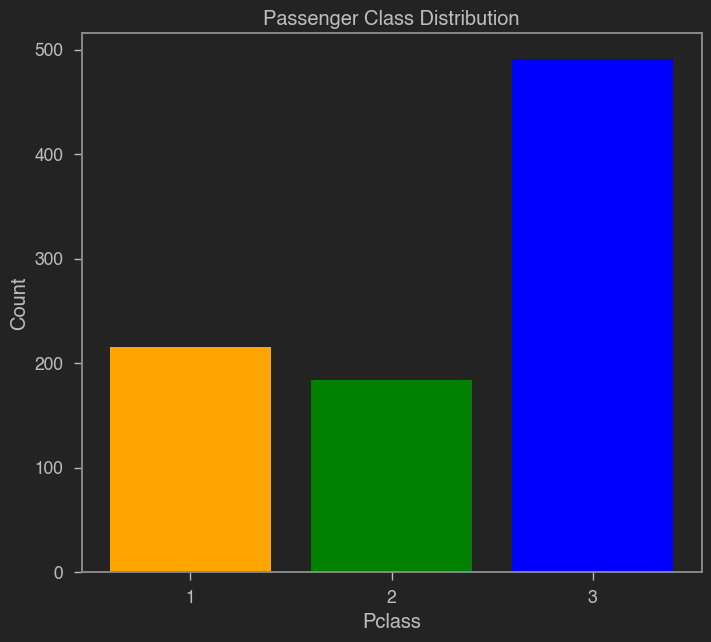

In [11]:
# Bar Chart to indicate the number of people who survived based on their class
# If you are a first class, you have a higher chance of survival

pclass_counts = titanic_df['Pclass'].value_counts()
colors = ['blue', 'orange', 'green']

plt.bar(pclass_counts.index, pclass_counts.values, color=colors)
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Passenger Class Distribution')
plt.xticks(pclass_counts.index)
plt.show()


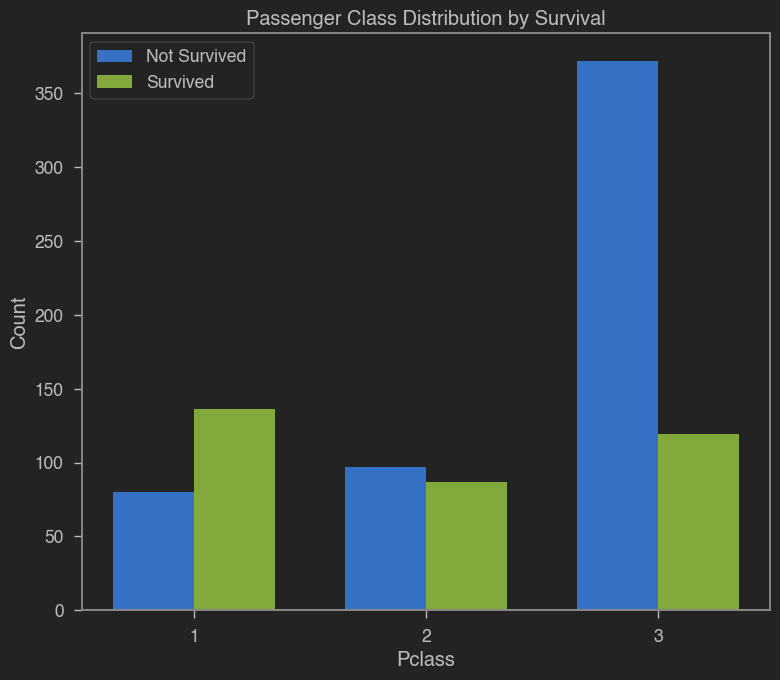

In [12]:
pclass_survived = titanic_df.groupby(['Pclass', 'Survived']).size().unstack()
width = 0.35
x = np.arange(len(pclass_survived.index))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, pclass_survived[0], width, label='Not Survived')
rects2 = ax.bar(x + width / 2, pclass_survived[1], width, label='Survived')

ax.set_xlabel('Pclass')
ax.set_ylabel('Count')
ax.set_title('Passenger Class Distribution by Survival')
ax.set_xticks(x)
ax.set_xticklabels(pclass_survived.index)
ax.legend()

fig.tight_layout()
plt.show()

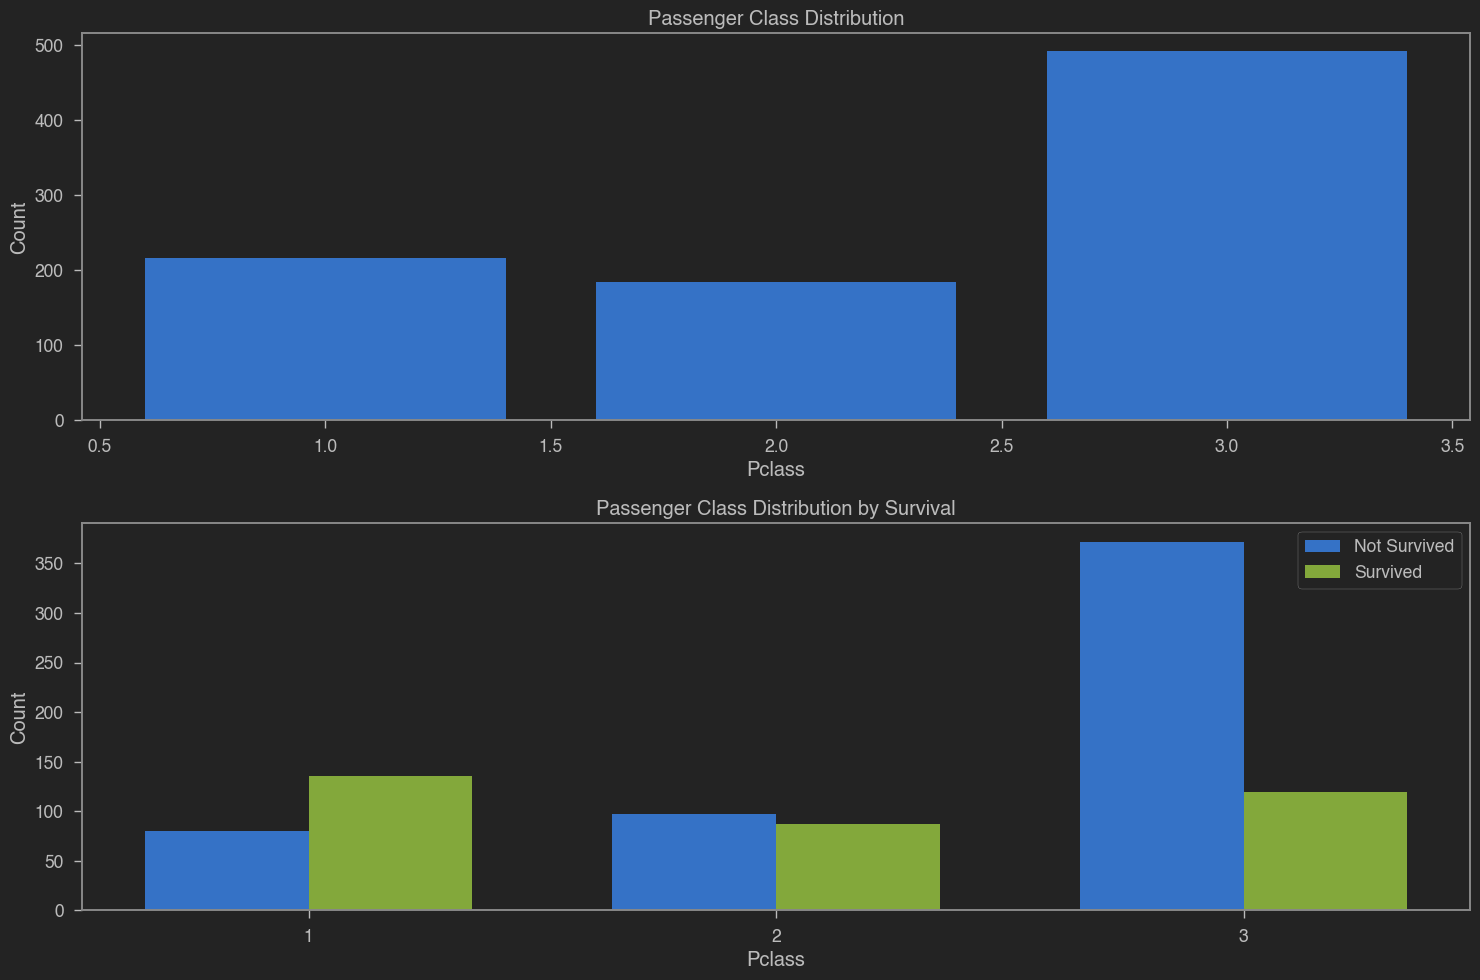

In [14]:
# Bar Chart to indicate the number of people who survived based on their class
# If you are a first class, you have a higher chance of survival

pclass_counts = titanic_df['Pclass'].value_counts().sort_index()
pclass_survived = titanic_df.groupby(['Pclass', 'Survived']).size().unstack()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# First subplot
ax1.bar(pclass_counts.index, pclass_counts.values)
ax1.set_xlabel('Pclass')
ax1.set_ylabel('Count')
ax1.set_title('Passenger Class Distribution')

# Second subplot
width = 0.35
x = np.arange(len(pclass_survived.index))

rects1 = ax2.bar(x - width / 2, pclass_survived[0], width, label='Not Survived')
rects2 = ax2.bar(x + width / 2, pclass_survived[1], width, label='Survived')

ax2.set_xlabel('Pclass')
ax2.set_ylabel('Count')
ax2.set_title('Passenger Class Distribution by Survival')
ax2.set_xticks(x)
ax2.set_xticklabels(pclass_survived.index)
ax2.legend()

fig.tight_layout()
plt.show()



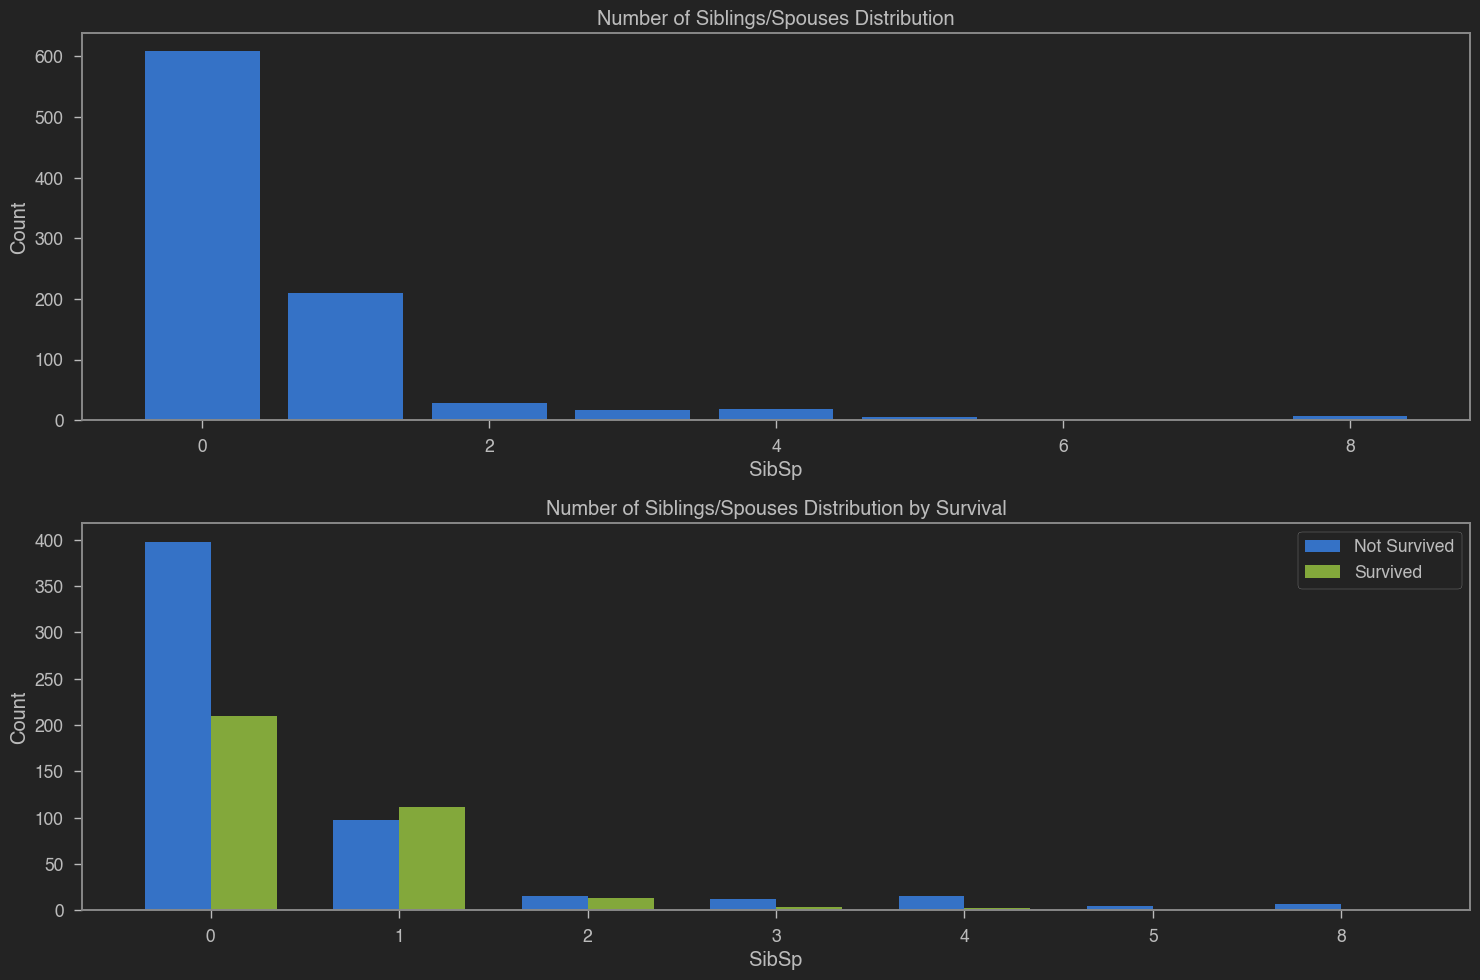

In [15]:
# Bar Chart to indicate the number of people who survived based on their Sibling status 
# If you have 01 or 02 Sibling, you have a higher chance of survival

sibsp_counts = titanic_df['SibSp'].value_counts().sort_index()
sibsp_survived = titanic_df.groupby(['SibSp', 'Survived']).size().unstack()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# First subplot
ax1.bar(sibsp_counts.index, sibsp_counts.values)
ax1.set_xlabel('SibSp')
ax1.set_ylabel('Count')
ax1.set_title('Number of Siblings/Spouses Distribution')

# Second subplot
width = 0.35
x = np.arange(len(sibsp_survived.index))

rects1 = ax2.bar(x - width / 2, sibsp_survived[0].fillna(0), width, label='Not Survived')
rects2 = ax2.bar(x + width / 2, sibsp_survived[1].fillna(0), width, label='Survived')

ax2.set_xlabel('SibSp')
ax2.set_ylabel('Count')
ax2.set_title('Number of Siblings/Spouses Distribution by Survival')
ax2.set_xticks(x)
ax2.set_xticklabels(sibsp_survived.index)
ax2.legend()

fig.tight_layout()
plt.show()

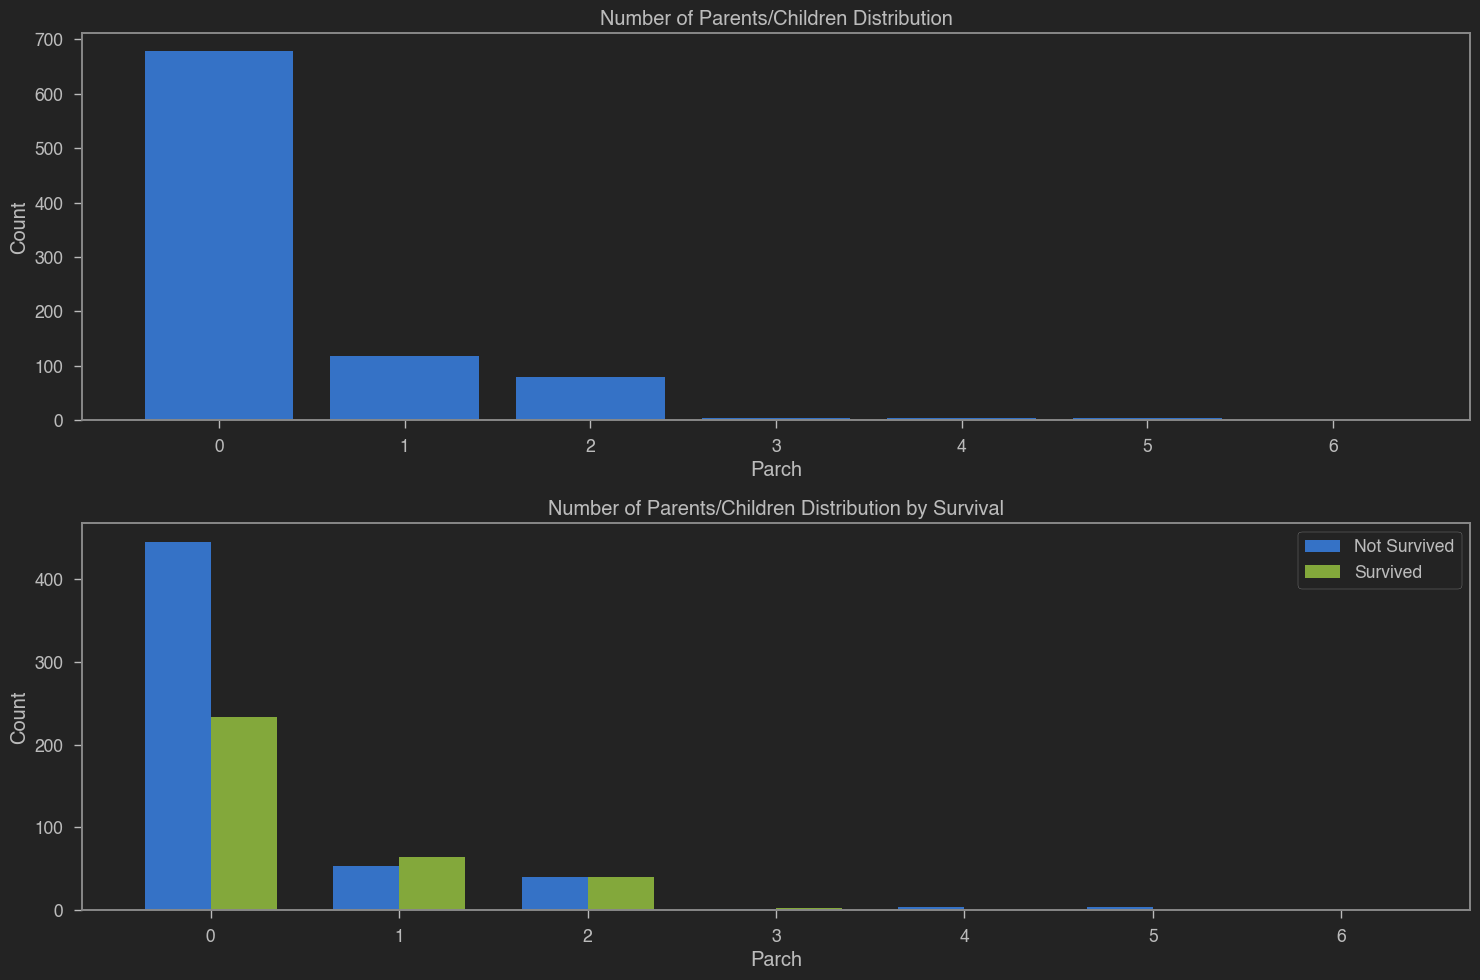

In [17]:
# Bar Chart to indicate the number of people who survived based on their Family member  


parch_counts = titanic_df['Parch'].value_counts().sort_index()
parch_survived = titanic_df.groupby(['Parch', 'Survived']).size().unstack()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# First subplot
ax1.bar(parch_counts.index, parch_counts.values)
ax1.set_xlabel('Parch')
ax1.set_ylabel('Count')
ax1.set_title('Number of Parents/Children Distribution')

# Second subplot
width = 0.35
x = np.arange(len(parch_survived.index))

rects1 = ax2.bar(x - width / 2, parch_survived[0].fillna(0), width, label='Not Survived')
rects2 = ax2.bar(x + width / 2, parch_survived[1].fillna(0), width, label='Survived')

ax2.set_xlabel('Parch')
ax2.set_ylabel('Count')
ax2.set_title('Number of Parents/Children Distribution by Survival')
ax2.set_xticks(x)
ax2.set_xticklabels(parch_survived.index)
ax2.legend()

fig.tight_layout()
plt.show()


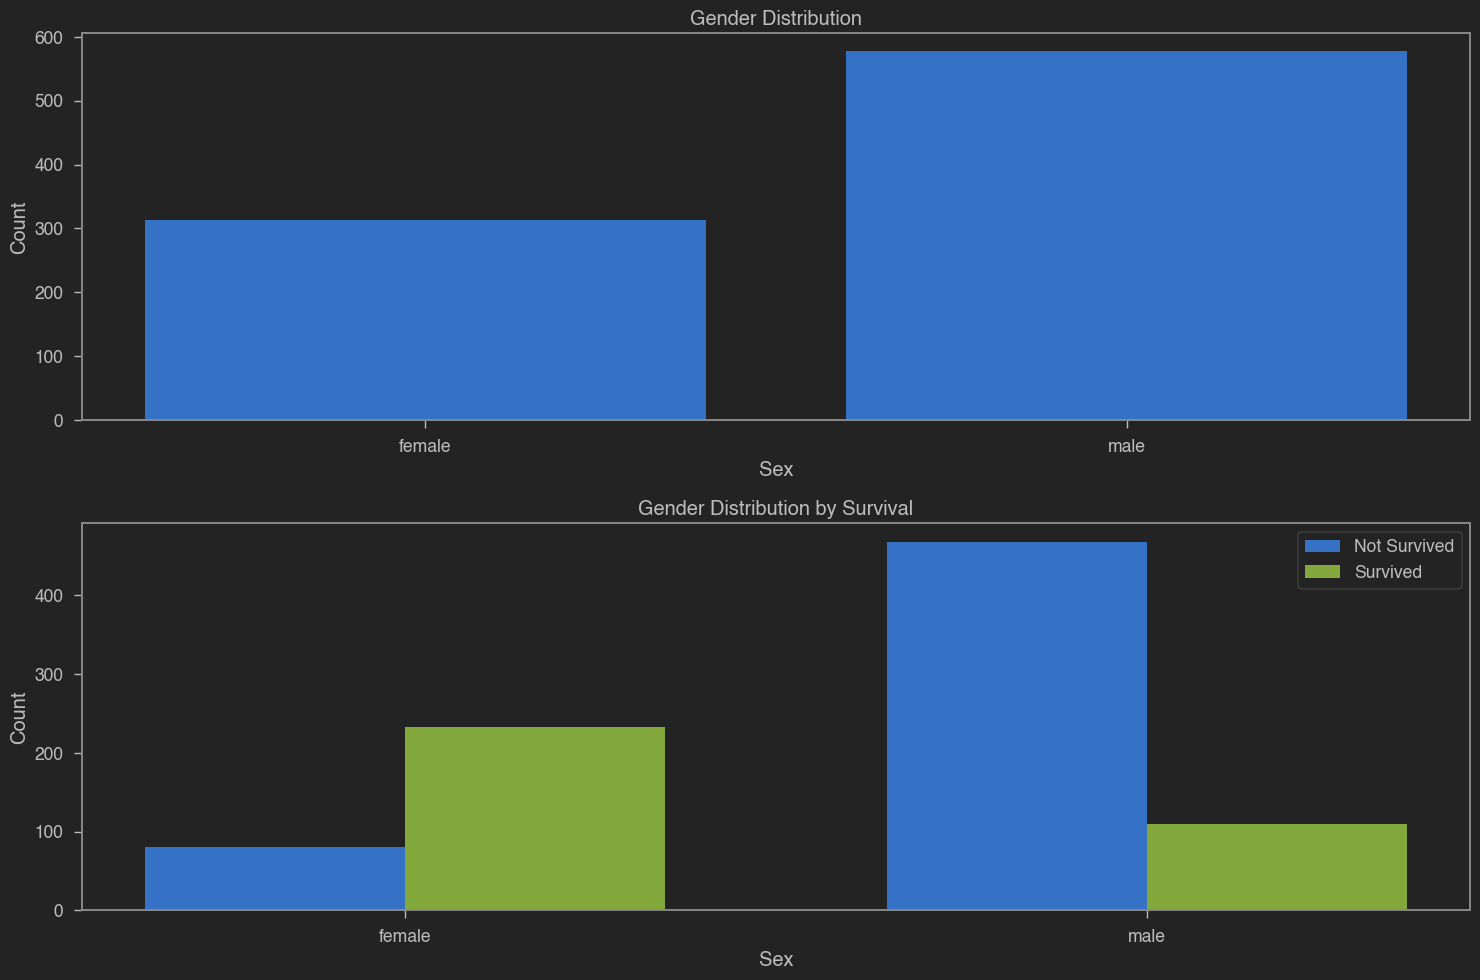

In [20]:
# Bar Chart to indicate the number of people who survived based on their Sex 

# If you are a female, you have a higher chance of survival 

# thats why Rose survived and Jack died 

sex_counts = titanic_df['Sex'].value_counts().sort_index()
sex_survived = titanic_df.groupby(['Sex', 'Survived']).size().unstack()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# First subplot
ax1.bar(sex_counts.index, sex_counts.values)
ax1.set_xlabel('Sex')
ax1.set_ylabel('Count')
ax1.set_title('Gender Distribution')

# Second subplot
width = 0.35
x = np.arange(len(sex_survived.index))

rects1 = ax2.bar(x - width / 2, sex_survived[0].fillna(0), width, label='Not Survived')
rects2 = ax2.bar(x + width / 2, sex_survived[1].fillna(0), width, label='Survived')

ax2.set_xlabel('Sex')
ax2.set_ylabel('Count')
ax2.set_title('Gender Distribution by Survival')
ax2.set_xticks(x)
ax2.set_xticklabels(sex_survived.index)
ax2.legend()

fig.tight_layout()
plt.show()


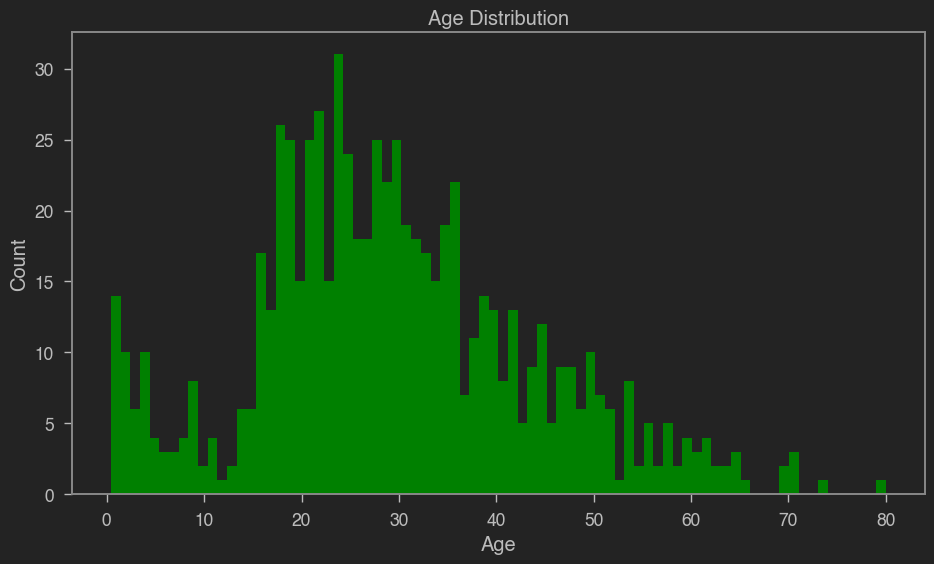

In [21]:
# age histogram of the passengers
plt.figure(figsize=(11, 6))
plt.hist(titanic_df['Age'].dropna(), bins=80, color='green')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

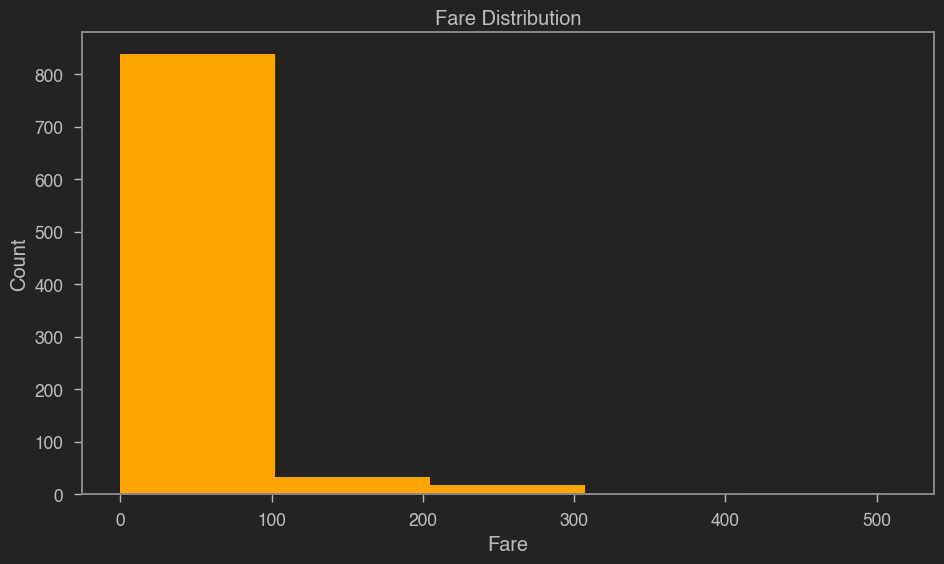

In [22]:
# Fares distribuation of the passengers
plt.figure(figsize=(11, 6))
plt.hist(titanic_df['Fare'], bins=5, color='orange')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Fare Distribution')
plt.show()